<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Garage3" data-toc-modified-id="Garage3-1">Garage3</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-1.1">Standard ICP</a></span></li><li><span><a href="#With-Segmentation" data-toc-modified-id="With-Segmentation-1.2">With Segmentation</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-1.3">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-1" data-toc-modified-id="Rumlang-1-2">Rumlang 1</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-2.1">Standard ICP</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-2.2">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-2" data-toc-modified-id="Rumlang-2-3">Rumlang 2</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-3.1">Standard ICP</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-3.2">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-3" data-toc-modified-id="Rumlang-3-4">Rumlang 3</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-4.1">Standard ICP</a></span></li></ul></li></ul></div>

In [69]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.interpolate
import scipy.spatial.transform as stf
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
!ls ~/asl/rss_2021_data

clean_data
pickelhaube_full_garage3
pickelhaube_full_garage3_icp_10.csv
pickelhaube_full_garage3_icp_11.csv
pickelhaube_full_garage3_icp_12.csv
pickelhaube_full_garage3_icp_13.csv
pickelhaube_full_garage3_icp_14.csv
pickelhaube_full_garage3_icp_15.csv
pickelhaube_full_garage3_icp_16.csv
pickelhaube_full_garage3_icp_17.csv
pickelhaube_full_garage3_icp_18.csv
pickelhaube_full_garage3_icp_19.csv
pickelhaube_full_garage3_icp_1.csv
pickelhaube_full_garage3_icp_20.csv
pickelhaube_full_garage3_icp_21.csv
pickelhaube_full_garage3_icp_22.csv
pickelhaube_full_garage3_icp_23.csv
pickelhaube_full_garage3_icp_24.csv
pickelhaube_full_garage3_icp_25.csv
pickelhaube_full_garage3_icp_26.csv
pickelhaube_full_garage3_icp_27.csv
pickelhaube_full_garage3_icp_28.csv
pickelhaube_full_garage3_icp_29.csv
pickelhaube_full_garage3_icp_2.csv
pickelhaube_full_garage3_icp_30.csv
pickelhaube_full_garage3_icp_31.csv
pickelhaube_full_garage3_icp_32.csv
pickelhaube_full_garage3_icp_33.csv
pickelhaube_full_garage3_icp_3

In [9]:
!ls ~/asl/rss_2021_data/clean_data

pickelhaube_segmentation_garage3_icp_12.csv
pickelhaube_segmentation_garage3_leica_12.csv


# Garage3
## Standard ICP

In [64]:
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage3_leica_27.csv')

In [65]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_garage3_icp_55.csv')

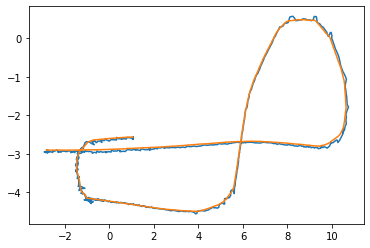

In [66]:
plt.figure()
plt.plot(icp1['trans_x'], icp1['trans_y'])
plt.plot(-leica['trans_y'], leica['trans_x'])

In [68]:
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'], -leica['trans_y'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'], leica['trans_x'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp['rmse_xy'].mean()

0.13252305474831794

(3, 6)

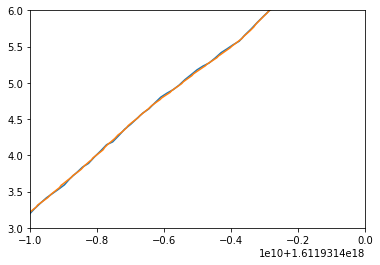

In [67]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp'] + 4.5e8, -leica['trans_y'])
plt.xlim(1.611931e18 + 3.9e11, 1.611931e18 + 4.0e11)
plt.ylim(3, 6)

## With Segmentation

In [35]:
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage3_leica_9.csv')
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_segmentation_garage3_icp_9.csv')


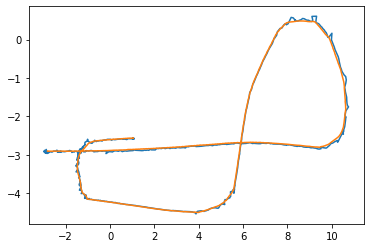

In [36]:
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(-leica['trans_y'], leica['trans_x'])

0.044083436563983114

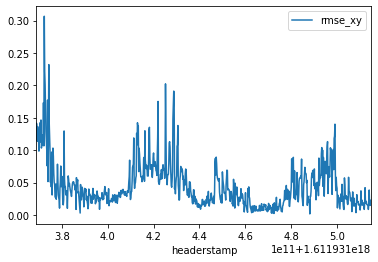

In [63]:
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, -leica['trans_y'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, leica['trans_x'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(3, 6)

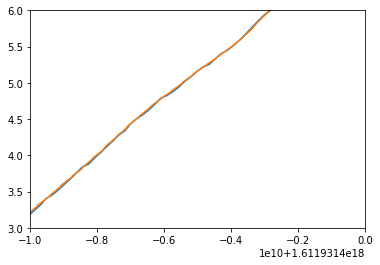

In [62]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp'] + 4.5e8, -leica['trans_y'])
plt.xlim(1.611931e18 + 3.9e11, 1.611931e18 + 4.0e11)
plt.ylim(3, 6)

## Segmentation from NYU

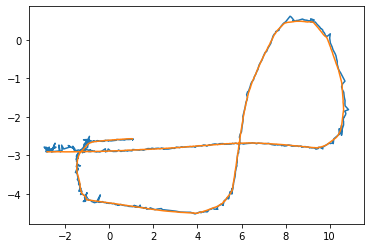

0.05542131578044619

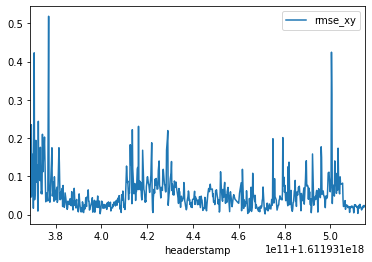

In [73]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage3_icp_6.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_garage3_leica_6.csv')
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(-leica['trans_y'], leica['trans_x'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, -leica['trans_y'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, leica['trans_x'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(3, 6)

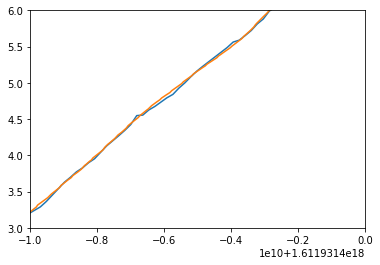

In [79]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp'] + 4.5e8, -leica['trans_y'])
plt.xlim(1.611931e18 + 3.9e11, 1.611931e18 + 4.0e11)
plt.ylim(3, 6)

# Rumlang 1
## Standard ICP

a failed example:

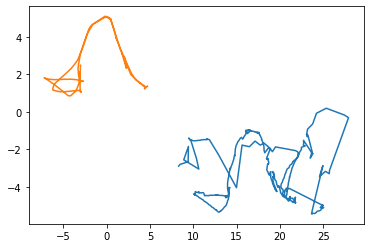

ValueError: A value in x_new is above the interpolation range.

In [80]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang1_icp_43.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang1_leica_43.csv')
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(-leica['trans_y'], leica['trans_x'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, -leica['trans_y'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp'] + 4.5e8, leica['trans_x'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(1.61278395e+18, 1.61278405e+18)

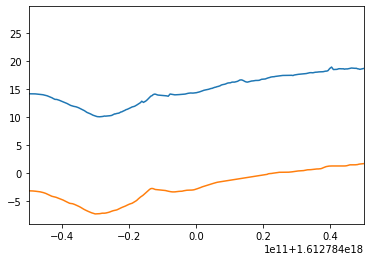

In [84]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp'] + 4.5e8, -leica['trans_y'])
plt.xlim(1.61278e18+39.5e11, 1.61278e18+40.5e11)

a better working example (rotated in the correct direction in the end)

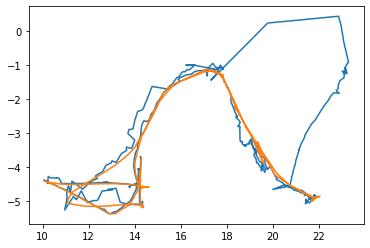

0.4552989621662345

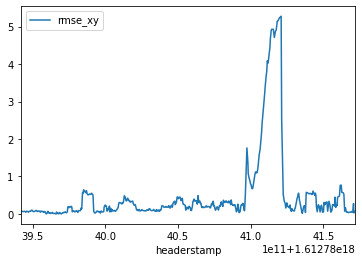

In [116]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang1_icp_44.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang1_leica_44.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(12, 14)

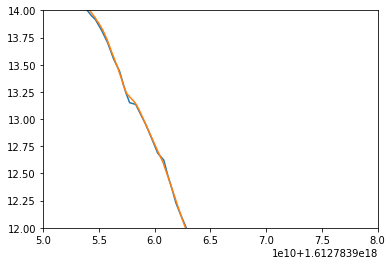

In [111]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp']  + 1.15e9, leica['aligned_x'])
plt.xlim(1.61278e18+39.5e11, 1.61278e18+39.8e11)
plt.ylim(12, 14)

## Segmentation from NYU

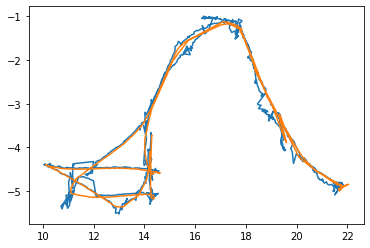

0.1324068418258569

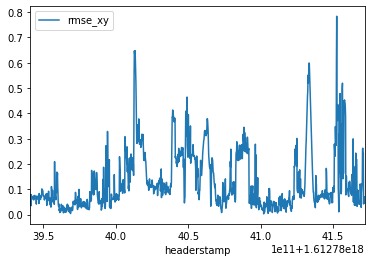

In [118]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_icp_3.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang1_leica_3.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

# Rumlang 2
## Standard ICP

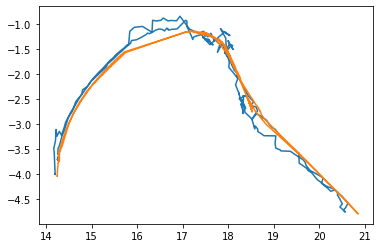

0.14412372344208826

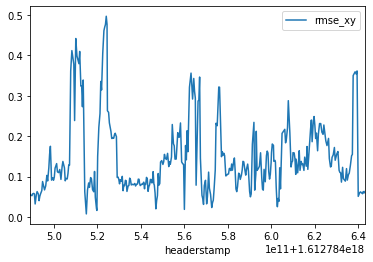

In [100]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang2_icp_2.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_full_rumlang2_leica_2.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_x'])
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.65e9, leica['aligned_y'])

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(14.5, 16.5)

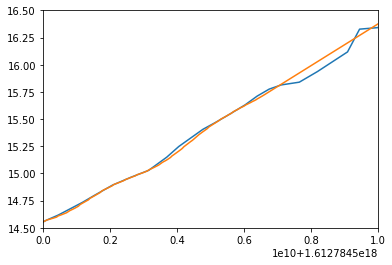

In [99]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp']  + 1.65e9, leica['aligned_x'])
plt.xlim(1.612784e18+5.0e11, 1.612784e18+5.1e11)
plt.ylim(14.5, 16.5)

## Segmentation from NYU

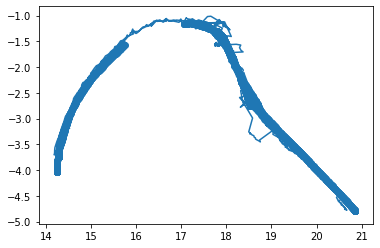

0.1284604427327006

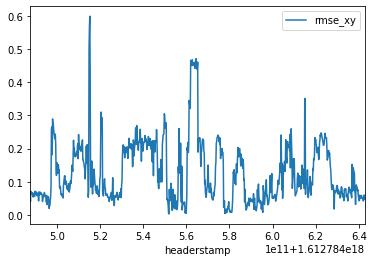

In [120]:
icp = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/pickelhaube_nyusegmentation_rumlang2_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.scatter(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
icp['rmse_xy'].mean()

(14.5, 16.5)

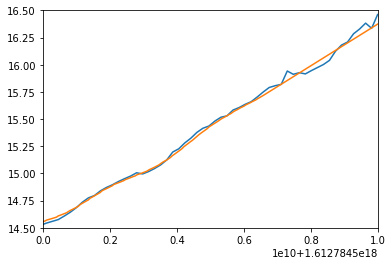

In [121]:
plt.plot(icp['headerstamp'], icp['trans_x'])
plt.plot(leica['headerstamp']  + 1.65e9, leica['aligned_x'])
plt.xlim(1.612784e18+5.0e11, 1.612784e18+5.1e11)
plt.ylim(14.5, 16.5)

# Rumlang 3
## Standard ICP